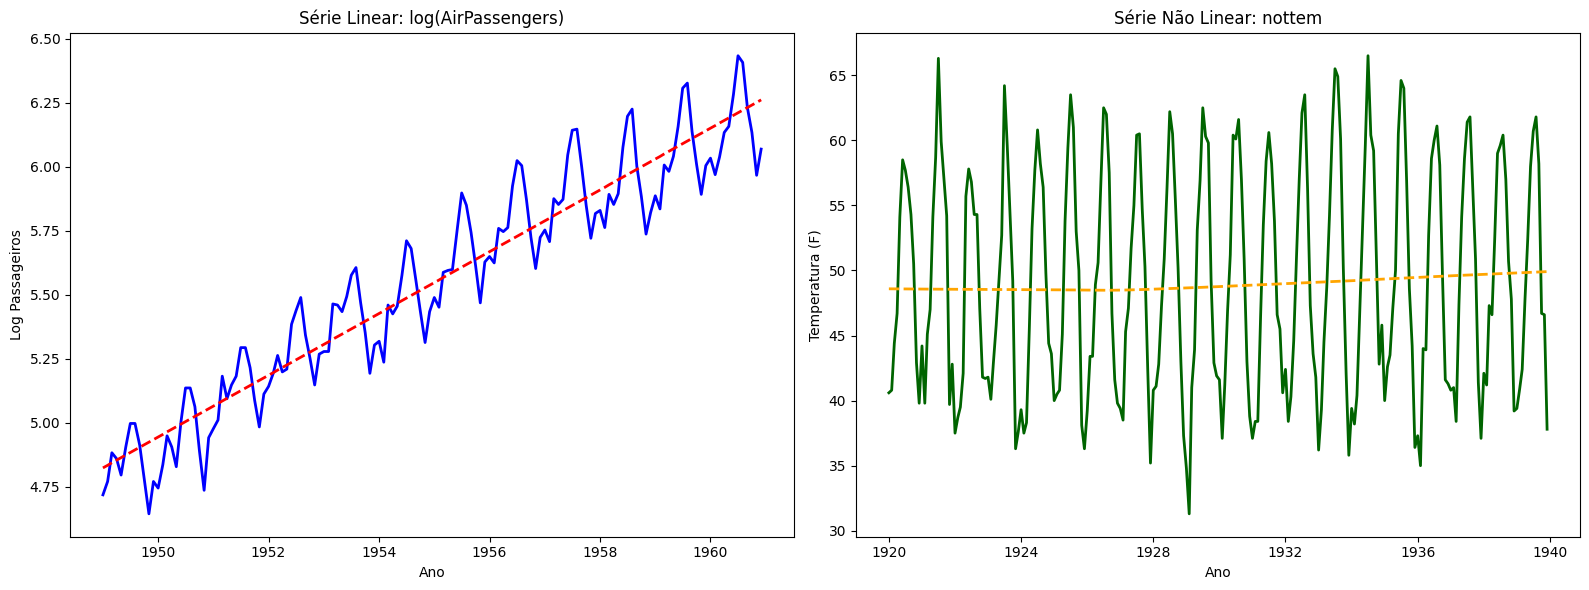

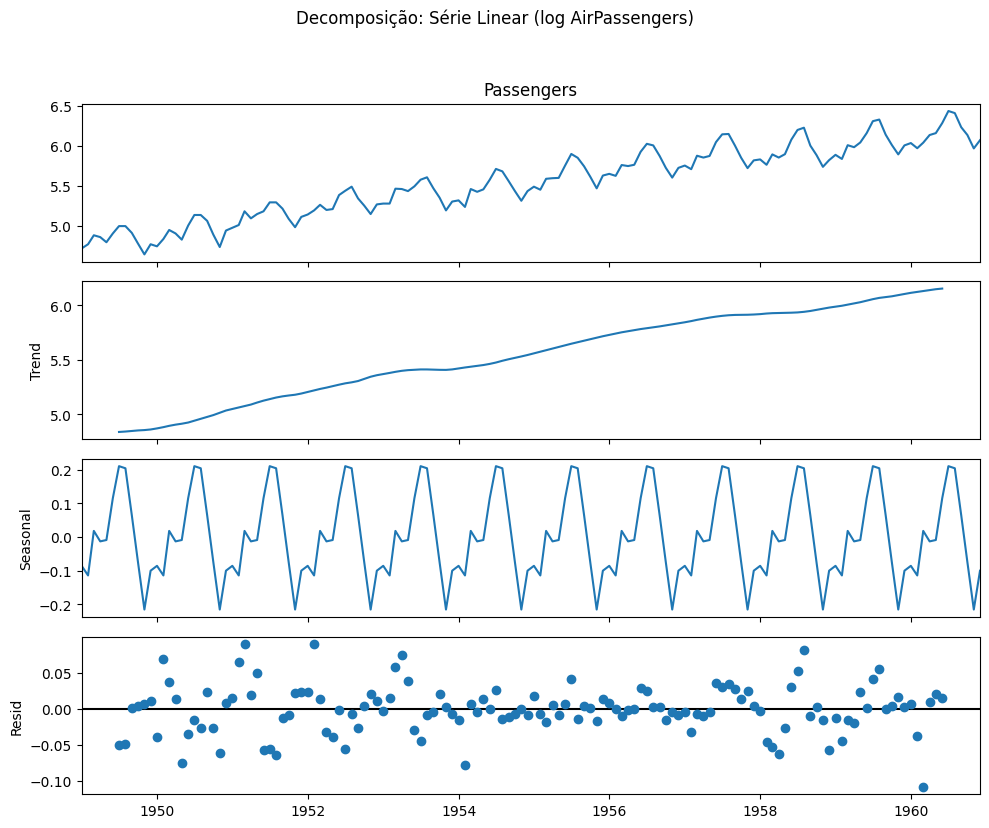

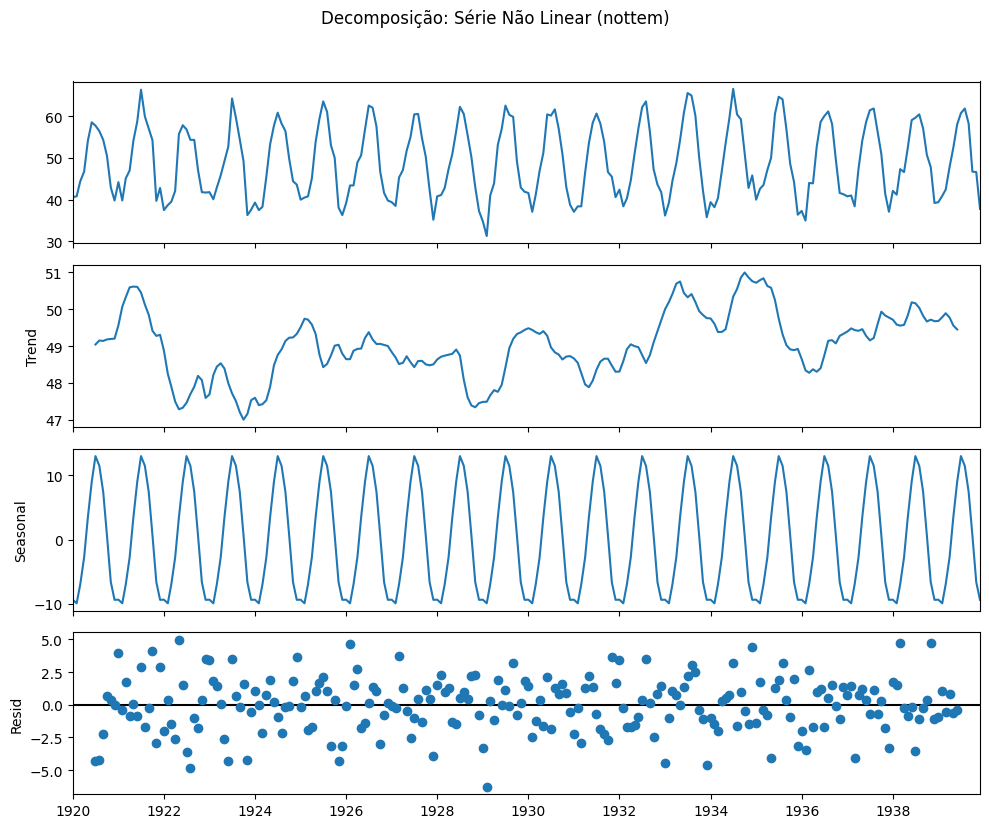

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# --- Preparação dos Dados (Air Passengers) ---

# URL para o dataset de passageiros de avião
url_air = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
# Leitura dos dados, convertendo a coluna 'Month' para datetime e usando-a como índice
air_passengers = pd.read_csv(url_air, parse_dates=['Month'], index_col='Month')

# A série original é multiplicativa. Aplicamos o logaritmo para linearizar a tendência
# e estabilizar a variância, tornando-a uma série aditiva.
log_air = np.log(air_passengers['Passengers'])


# --- Preparação dos Dados (Nottingham Temperatures) ---

# Carrega o dataset 'nottem' (temperaturas de Nottingham) que vem com o statsmodels
nottem_data = sm.datasets.get_rdataset("nottem", "datasets",cache=True).data

# O dataset original não tem um índice de data.
# Precisamos criar um índice de datas mensal (MS = Month Start)
# cobrindo o período de 1920 a 1939 (o tamanho do dataset).
nottem_index = pd.date_range(start='1920-01-01', periods=len(nottem_data), freq='MS')

# Cria a Série (Series) do pandas combinando os valores de temperatura com o índice de datas
nottem = pd.Series(nottem_data['value'].values, index=nottem_index)


# --- 1. Visualização Comparativa das Séries ---

# Cria uma figura com dois subplots (gráficos) lado a lado (1 linha, 2 colunas)
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# --- Gráfico 1: Série de Passageiros (log_air) ---
ax1.plot(log_air.index, log_air, color="blue", linewidth=2)
ax1.set_xlabel("Ano")
ax1.set_ylabel("Log Passageiros")
ax1.set_title("Série Linear: log(AirPassengers)")

# Adiciona uma linha de tendência (Regressão Linear)
# 1. Para a regressão, precisamos de um eixo 'x' numérico (ex: 0, 1, 2...), não de datas
tempo_air = np.arange(len(log_air))
# 2. Calcula a regressão linear
slope, intercept, r, p, std_err = linregress(tempo_air, log_air)
# 3. Gera os valores Y da linha de tendência (fórmula: y = mx + b)
linha_regressao = (slope * tempo_air) + intercept
# Plota a linha de tendência no gráfico
ax1.plot(log_air.index, linha_regressao, color="red", linestyle="--", linewidth=2)

# --- Gráfico 2: Série de Temperaturas (nottem) ---
ax2.plot(nottem.index, nottem, color="darkgreen", linewidth=2)
ax2.set_xlabel("Ano")
ax2.set_ylabel("Temperatura (F)")
ax2.set_title("Série Não Linear: nottem")

# Adiciona uma linha de tendência (Suavização LOWESS)
# 1. 'lowess' também requer um eixo 'x' numérico
tempo_nottem = np.arange(len(nottem))
# 2. Calcula a suavização
suavizacao = lowess(nottem, tempo_nottem)
# Plota a linha de tendência (o resultado do lowess está na coluna 1 do array)
ax2.plot(nottem.index, suavizacao[:, 1], color="orange", linestyle="--", linewidth=2)

# Otimiza o layout para evitar sobreposição
plt.tight_layout()
# Exibe a figura
plt.show()


# --- 2. Análise de Decomposição ---

# --- Decomposição da série de passageiros (log_air) ---
# Usamos o modelo 'additive' (aditivo) pois a série foi linearizada com log
decomp_linear = seasonal_decompose(log_air, model='additive', period=12)
# O método .plot() já gera a figura com os 4 componentes
# (Original, Tendência, Sazonalidade, Resíduo)
fig_linear = decomp_linear.plot()
fig_linear.set_size_inches(10, 8) # Ajusta o tamanho da figura
fig_linear.suptitle("Decomposição: Série Linear (log AirPassengers)", y=1.03)
plt.tight_layout() # Ajusta para evitar sobreposição de texto
plt.show()

# --- Decomposição da série de temperaturas (nottem) ---
# Esta série já possui uma natureza aditiva
decomp_nao_linear = seasonal_decompose(nottem, model='additive', period=12)
# Gera o gráfico de decomposição
fig_nao_linear = decomp_nao_linear.plot()
fig_nao_linear.set_size_inches(10, 8)
fig_nao_linear.suptitle("Decomposição: Série Não Linear (nottem)", y=1.03)
plt.tight_layout()
plt.show()